### About Dataset
The dataset comprises information on 1000 customers, with 84 features derived from their financial transactions and current financial standing. The primary objective is to leverage this dataset for credit risk estimation and predicting potential defaults.

- CUST_ID: Unique customer identifier
Key Target Variables:

- CREDIT_SCORE: Numerical target variable representing the customer's credit score (integer)
- DEFAULT: Binary target variable indicating if the customer has defaulted (1) or not (0)
Description of Features:

- INCOME: Total income in the last 12 months
- SAVINGS: Total savings in the last 12 months
- DEBT: Total existing debt
- R_SAVINGS_INCOME: Ratio of savings to income
- R_DEBT_INCOME: Ratio of debt to income
- R_DEBT_SAVINGS: Ratio of debt to savings

### Transaction groups (GROCERIES, CLOTHING, HOUSING, EDUCATION, HEALTH, TRAVEL, ENTERTAINMENT, GAMBLING, UTILITIES, TAX, FINES) are categorized.

- T_{GROUP}_6: Total expenditure in that group in the last 6 months
- T_GROUP_12: Total expenditure in that group in the last 12 months
- R_[GROUP]: Ratio of T_[GROUP]6 to T[GROUP]_12
- R_[GROUP]INCOME: Ratio of T[GROUP]_12 to INCOME
- R_[GROUP]SAVINGS: Ratio of T[GROUP]_12 to SAVINGS
- R_[GROUP]DEBT: Ratio of T[GROUP]_12 to DEBT
### Categorical Features:

- CAT_GAMBLING: Gambling category (none, low, high)
- CAT_DEBT: 1 if the customer has debt; 0 otherwise
- CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise
- CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise
- CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise
- CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise
### See XAI course based on this dataset: https://adataodyssey.com/courses/xai-with-python/

In [41]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('../../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../../data/for_modelling/credit_score_valid.csv')
df=pd.concat([df_train, df_val])
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,2783,1855,0,0.6665,0.00,0.0000,103,74,0.7184,0.0370,...,2.5003,0.0000,No,0,0,0,1,0,570,0
1,314430,445442,707468,1.4167,2.25,1.5882,35861,29157,0.8131,0.1141,...,0.5882,0.3704,High,1,0,1,1,0,691,0
2,161773,517674,2782496,3.2000,17.20,5.3750,3716,2533,0.6816,0.0230,...,0.3125,0.0581,No,1,1,1,1,1,520,0
3,16014,97685,20818,6.1000,1.30,0.2131,637,187,0.2936,0.0398,...,0.1639,0.7692,No,1,0,0,1,0,654,0
4,193225,1410542,2589215,7.3000,13.40,1.8356,5276,2325,0.4407,0.0273,...,0.1370,0.0746,No,1,1,0,1,1,552,0


In [42]:
#shape
df.shape

(628, 86)

We are going to predict  default column

FULL Automatic EDA is not possible because of the number of columns. It generates 1 GB of html file. We will do it manually

In [43]:
target = 'DEFAULT'

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INCOME,628.0,122852.219745,1.117353e+05,0.0,30494.50,86994.00000,1.830045e+05,5.456670e+05
SAVINGS,628.0,423495.367834,4.459637e+05,0.0,75296.25,294634.50000,6.272762e+05,2.738164e+06
DEBT,628.0,831511.049363,1.013800e+06,0.0,49783.75,405650.00000,1.329519e+06,5.968620e+06
R_SAVINGS_INCOME,628.0,4.251653,4.045379e+00,0.0,1.10,2.71365,6.999925e+00,1.611120e+01
R_DEBT_INCOME,628.0,6.050788,5.793431e+00,0.0,1.50,4.88335,8.725000e+00,3.700060e+01
...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,628.0,0.189490,3.922101e-01,0.0,0.00,0.00000,0.000000e+00,1.000000e+00
CAT_SAVINGS_ACCOUNT,628.0,0.995223,6.900603e-02,0.0,1.00,1.00000,1.000000e+00,1.000000e+00
CAT_DEPENDENTS,628.0,0.171975,3.776591e-01,0.0,0.00,0.00000,0.000000e+00,1.000000e+00
CREDIT_SCORE,628.0,587.060510,6.214696e+01,300.0,555.00,593.50000,6.300000e+02,8.000000e+02


In [45]:
df.describe(include='object').T

,count,unique,top,freq
CAT_GAMBLING,628,3,No,392


In [46]:
numerical_data = df.select_dtypes(include=[np.number])
#variance
numerical_data.var().sort_values(ascending=False)

DEBT                1.027790e+12
SAVINGS             1.988837e+11
INCOME              1.248477e+10
T_EXPENDITURE_12    7.675550e+09
T_EXPENDITURE_6     2.339506e+09
                        ...     
R_UTILITIES         3.684665e-06
R_EDUCATION         3.682588e-06
R_FINES_INCOME      2.453861e-06
R_FINES_DEBT        9.168721e-07
R_HOUSING           1.243661e-08
Length: 85, dtype: float64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 628 entries, 0 to 137
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCOME                   628 non-null    int64  
 1   SAVINGS                  628 non-null    int64  
 2   DEBT                     628 non-null    int64  
 3   R_SAVINGS_INCOME         628 non-null    float64
 4   R_DEBT_INCOME            628 non-null    float64
 5   R_DEBT_SAVINGS           628 non-null    float64
 6   T_CLOTHING_12            628 non-null    int64  
 7   T_CLOTHING_6             628 non-null    int64  
 8   R_CLOTHING               628 non-null    float64
 9   R_CLOTHING_INCOME        628 non-null    float64
 10  R_CLOTHING_SAVINGS       628 non-null    float64
 11  R_CLOTHING_DEBT          628 non-null    float64
 12  T_EDUCATION_12           628 non-null    int64  
 13  T_EDUCATION_6            628 non-null    int64  
 14  R_EDUCATION              628 no

There are no missing values in the dataset

In [48]:
df.nunique()

INCOME                 599
SAVINGS                626
DEBT                   593
R_SAVINGS_INCOME       363
R_DEBT_INCOME          393
                      ... 
CAT_MORTGAGE             2
CAT_SAVINGS_ACCOUNT      2
CAT_DEPENDENTS           2
CREDIT_SCORE           212
DEFAULT                  2
Length: 86, dtype: int64

In [49]:
# Let's check the distribution of the each gambing category according to the default
df['CAT_GAMBLING'].value_counts()

CAT_GAMBLING
No      392
High    163
Low      73
Name: count, dtype: int64

<Axes: xlabel='CAT_GAMBLING', ylabel='count'>

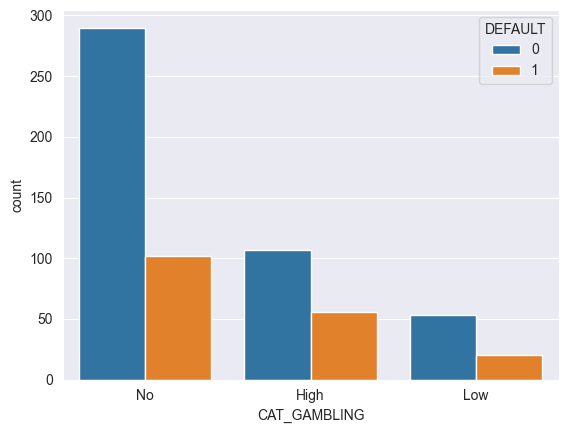

In [50]:
sns.countplot(data=df, x='CAT_GAMBLING', hue=target)

We see something interesting. People with high gambling category have higher default rate.

In [51]:
# Let's check the distribution of the each debt category according to the default
df['CAT_DEBT'].value_counts()

CAT_DEBT
1    593
0     35
Name: count, dtype: int64

<Axes: xlabel='CAT_DEBT', ylabel='count'>

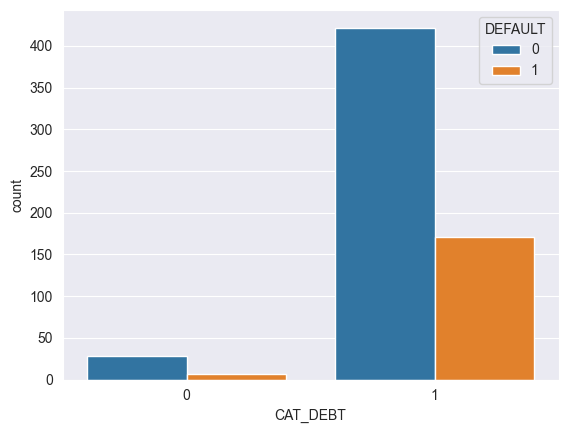

In [52]:
sns.countplot(data=df, x='CAT_DEBT', hue=target)

We see something interesting. People with debt have higher default rate, but there are small number of people without debt.

array([[<Axes: title={'center': 'INCOME'}>,
        <Axes: title={'center': 'SAVINGS'}>,
        <Axes: title={'center': 'DEBT'}>,
        <Axes: title={'center': 'R_SAVINGS_INCOME'}>,
        <Axes: title={'center': 'R_DEBT_INCOME'}>,
        <Axes: title={'center': 'R_DEBT_SAVINGS'}>,
        <Axes: title={'center': 'T_CLOTHING_12'}>,
        <Axes: title={'center': 'T_CLOTHING_6'}>,
        <Axes: title={'center': 'R_CLOTHING'}>],
       [<Axes: title={'center': 'R_CLOTHING_INCOME'}>,
        <Axes: title={'center': 'R_CLOTHING_SAVINGS'}>,
        <Axes: title={'center': 'R_CLOTHING_DEBT'}>,
        <Axes: title={'center': 'T_EDUCATION_12'}>,
        <Axes: title={'center': 'T_EDUCATION_6'}>,
        <Axes: title={'center': 'R_EDUCATION'}>,
        <Axes: title={'center': 'R_EDUCATION_INCOME'}>,
        <Axes: title={'center': 'R_EDUCATION_SAVINGS'}>,
        <Axes: title={'center': 'R_EDUCATION_DEBT'}>],
       [<Axes: title={'center': 'T_ENTERTAINMENT_12'}>,
        <Axes: title={

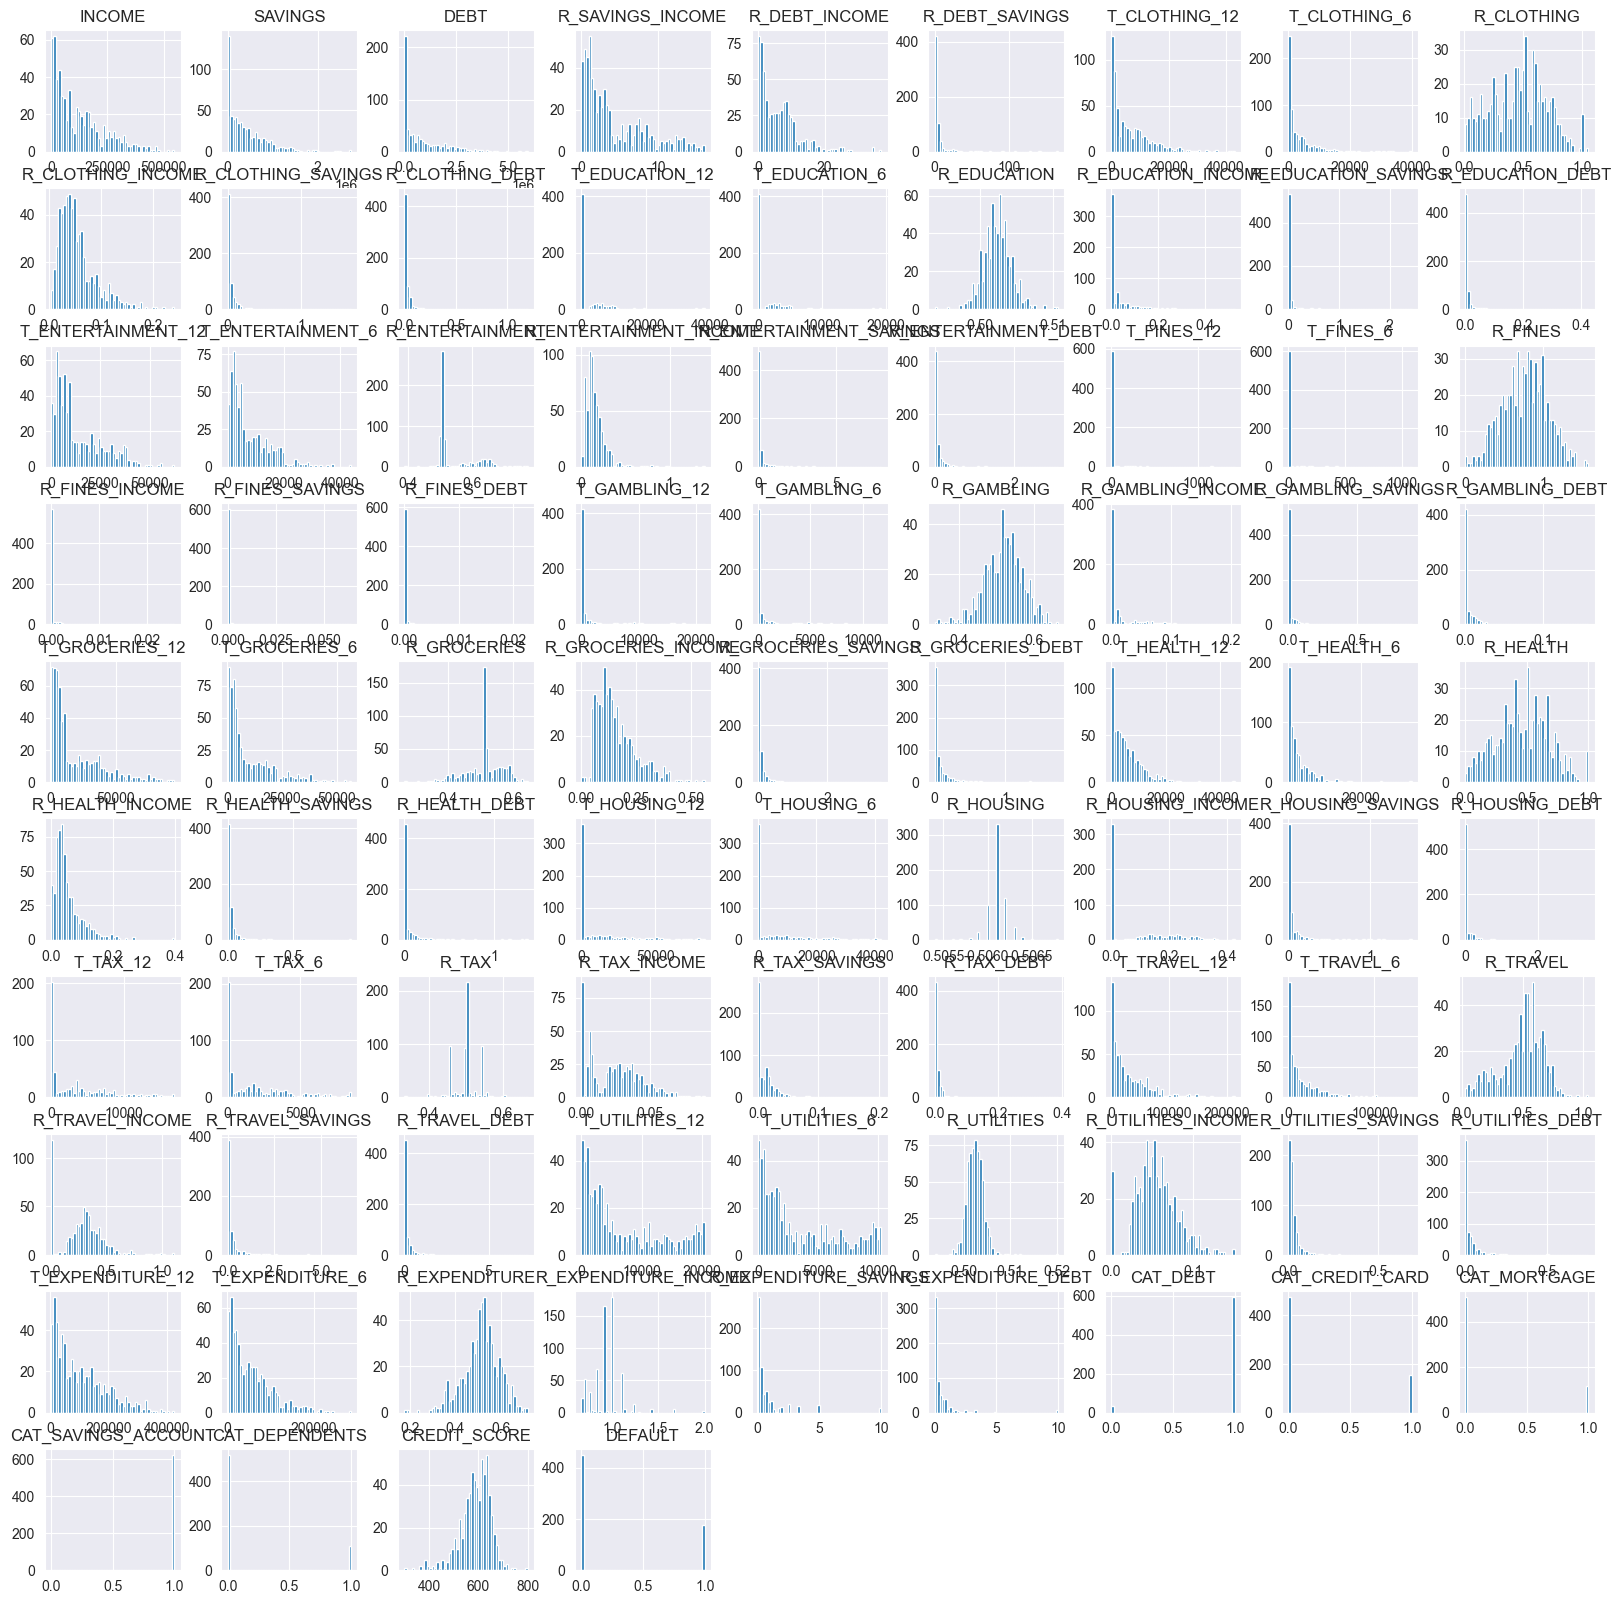

In [53]:
#plt.figure(figsize=(20,20))
df.hist(bins=50, figsize=(20,20))

In [54]:
#how many numeric columns are here
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['INCOME',
 'SAVINGS',
 'DEBT',
 'R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'T_CLOTHING_12',
 'T_CLOTHING_6',
 'R_CLOTHING',
 'R_CLOTHING_INCOME',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'T_EDUCATION_12',
 'T_EDUCATION_6',
 'R_EDUCATION',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'T_ENTERTAINMENT_12',
 'T_ENTERTAINMENT_6',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_SAVINGS',
 'R_ENTERTAINMENT_DEBT',
 'T_FINES_12',
 'T_FINES_6',
 'R_FINES',
 'R_FINES_INCOME',
 'R_FINES_SAVINGS',
 'R_FINES_DEBT',
 'T_GAMBLING_12',
 'T_GAMBLING_6',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'T_GROCERIES_12',
 'T_GROCERIES_6',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'T_HEALTH_12',
 'T_HEALTH_6',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'T_HOUSING_12',
 'T_HOUSING_6',
 'R_HOUSING',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R

In [55]:
len(numeric_columns)

85

In [56]:
# remove from numeric columns columns with T or R as first letter
numeric_columns = [col for col in numeric_columns if not col.startswith('T_') and not col.startswith('R_')]
# remove last one
numeric_columns = numeric_columns[:-1]
numeric_columns

['INCOME',
 'SAVINGS',
 'DEBT',
 'CAT_DEBT',
 'CAT_CREDIT_CARD',
 'CAT_MORTGAGE',
 'CAT_SAVINGS_ACCOUNT',
 'CAT_DEPENDENTS',
 'CREDIT_SCORE']

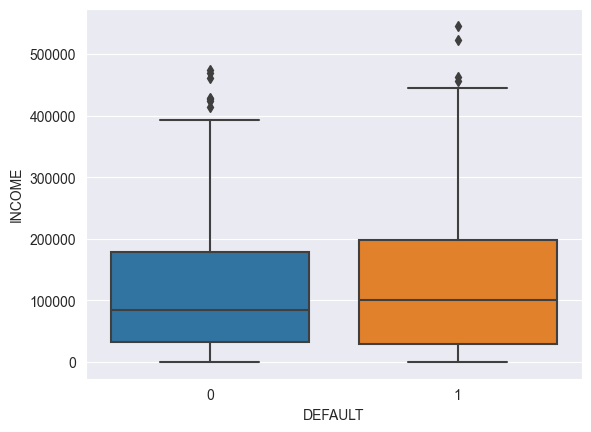

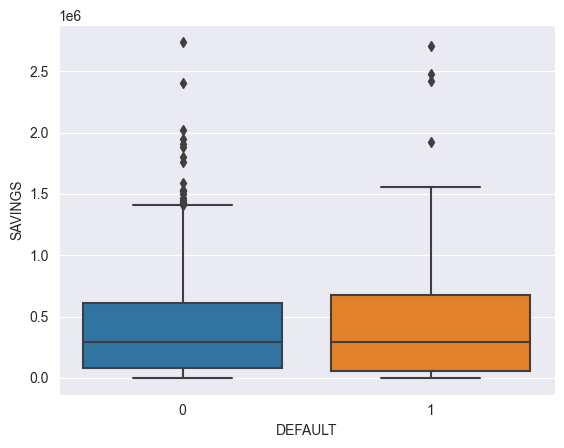

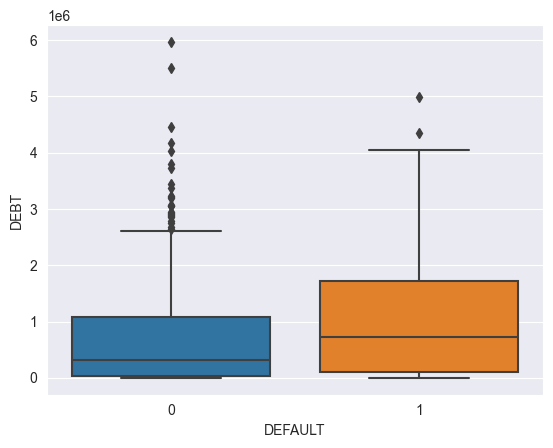

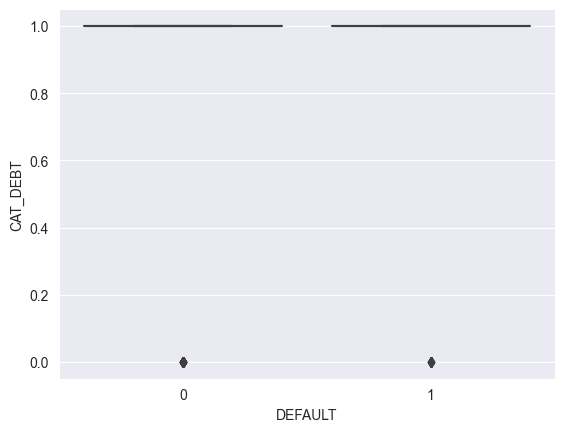

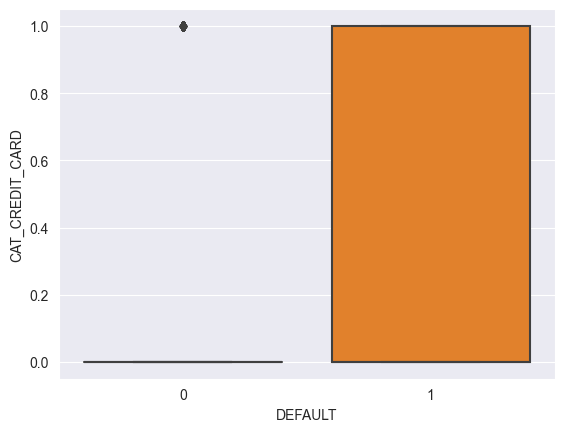

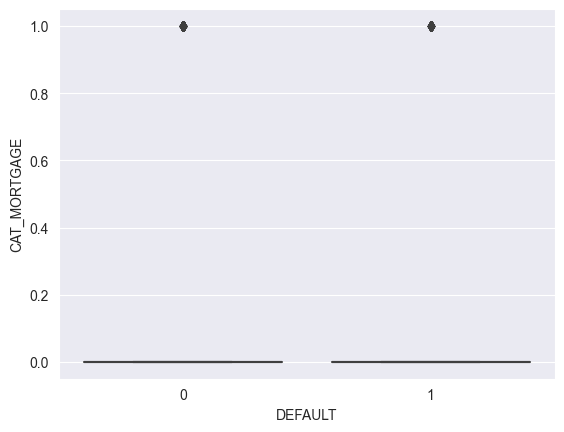

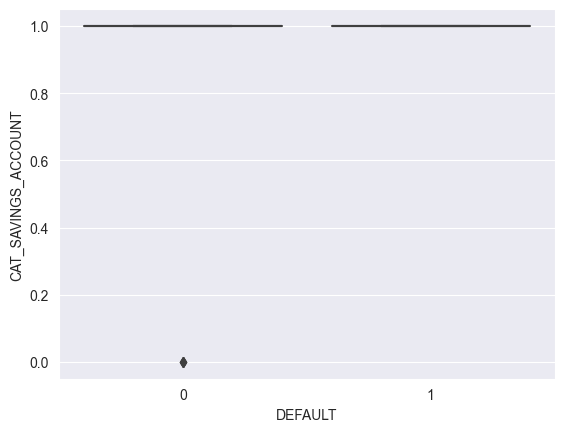

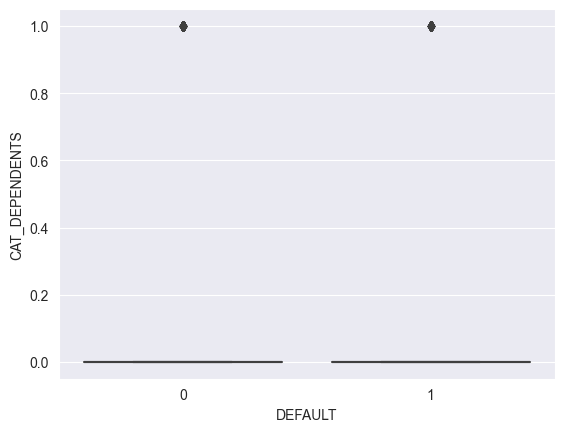

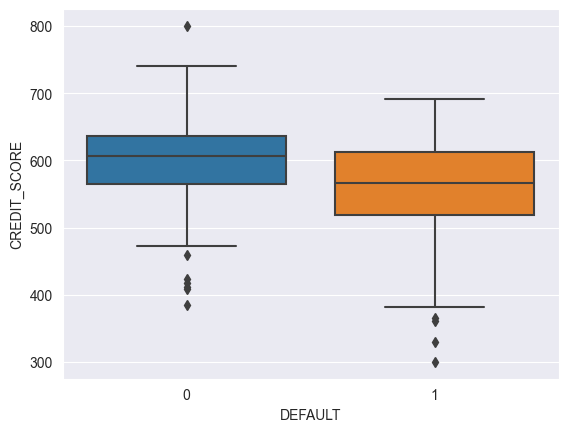

In [57]:
for col in numeric_columns:
    sns.boxplot(data=df, x=target, y=col)
    plt.show()

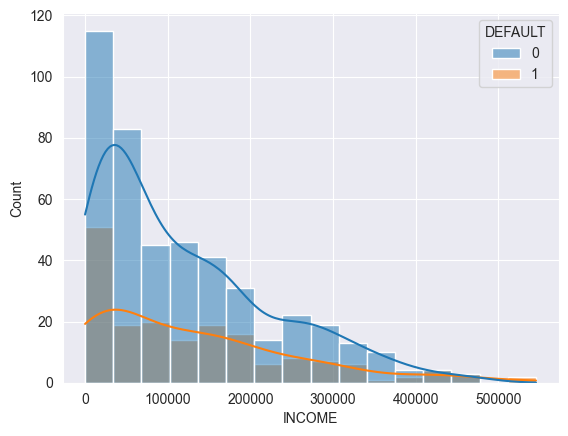

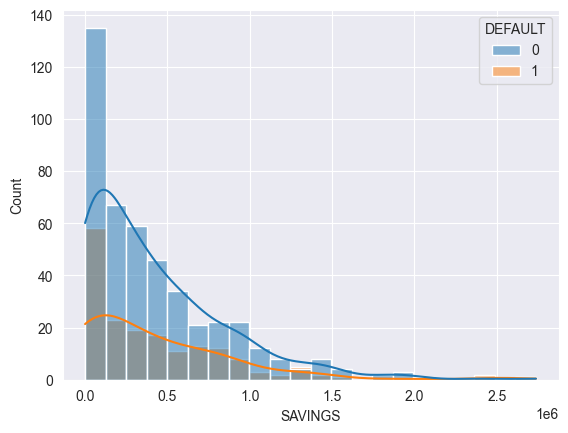

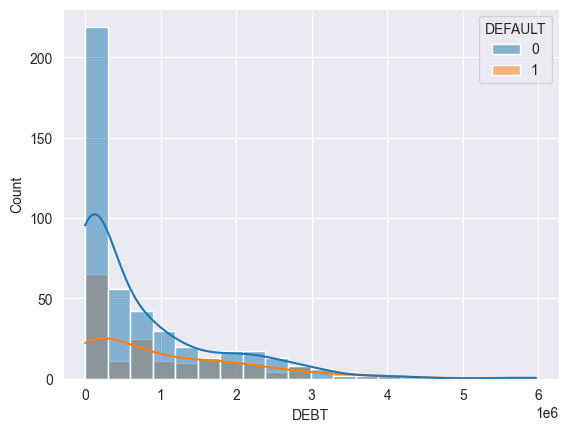

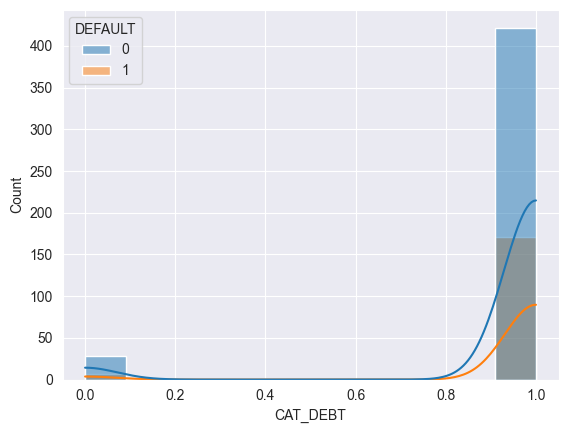

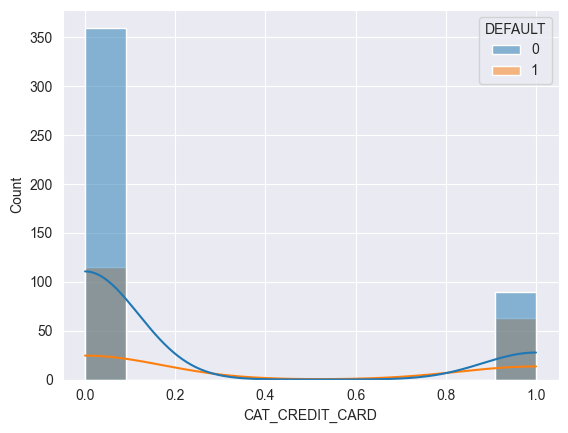

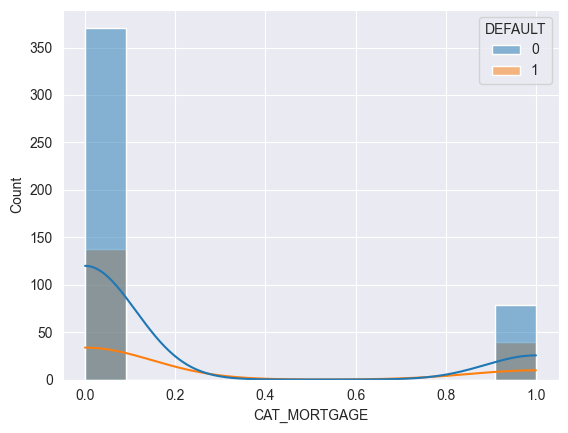

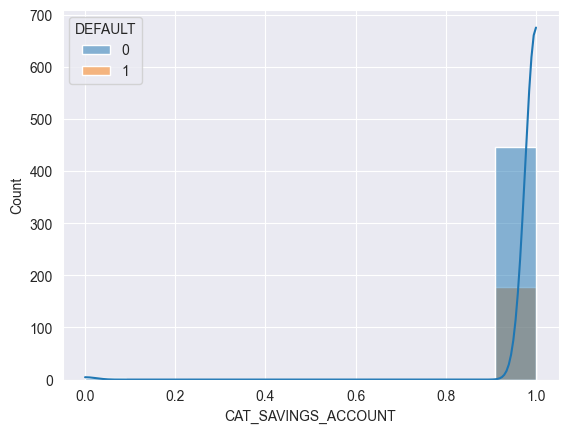

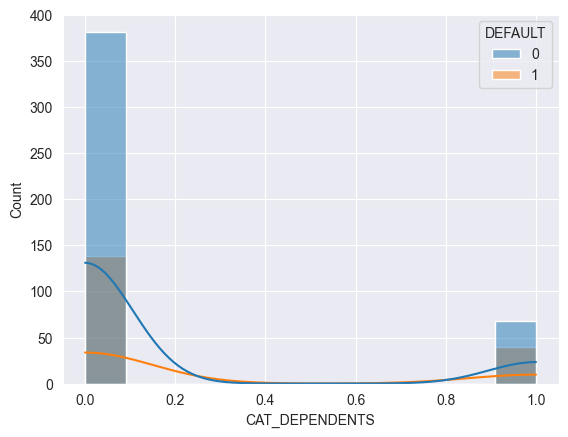

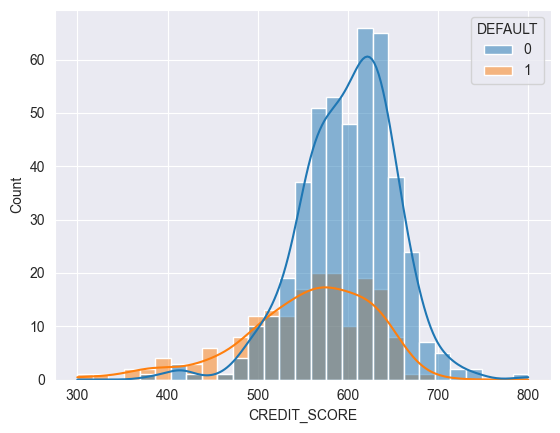

In [58]:
#histogram of numeric_columns
for col in numeric_columns:
    sns.histplot(data=df, x=col, hue=target, kde=True)
    plt.show()

In [59]:
#correlation matrix without first column
correlation_matrix = df[numeric_columns].corr()
correlation_matrix

,INCOME,SAVINGS,DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
INCOME,1.000000,0.639551,0.794340,0.235680,0.551219,0.372637,0.067813,0.234979,-0.028914
SAVINGS,0.639551,1.000000,0.563463,0.206447,0.363834,0.403604,0.065844,0.559721,0.022086
DEBT,0.794340,0.563463,1.000000,0.199420,0.680752,0.342674,0.054728,0.387629,-0.378567
CAT_DEBT,0.235680,0.206447,0.199420,1.000000,0.137881,0.117468,0.083838,0.110718,-0.178612
CAT_CREDIT_CARD,0.551219,0.363834,0.680752,0.137881,1.000000,0.236708,0.039321,0.272172,-0.259029
CAT_MORTGAGE,0.372637,0.403604,0.342674,0.117468,0.236708,1.000000,-0.025429,0.242645,0.002800
CAT_SAVINGS_ACCOUNT,0.067813,0.065844,0.054728,0.083838,0.039321,-0.025429,1.000000,0.031574,-0.023362
CAT_DEPENDENTS,0.234979,0.559721,0.387629,0.110718,0.272172,0.242645,0.031574,1.000000,-0.177667
CREDIT_SCORE,-0.028914,0.022086,-0.378567,-0.178612,-0.259029,0.002800,-0.023362,-0.177667,1.000000


<Axes: >

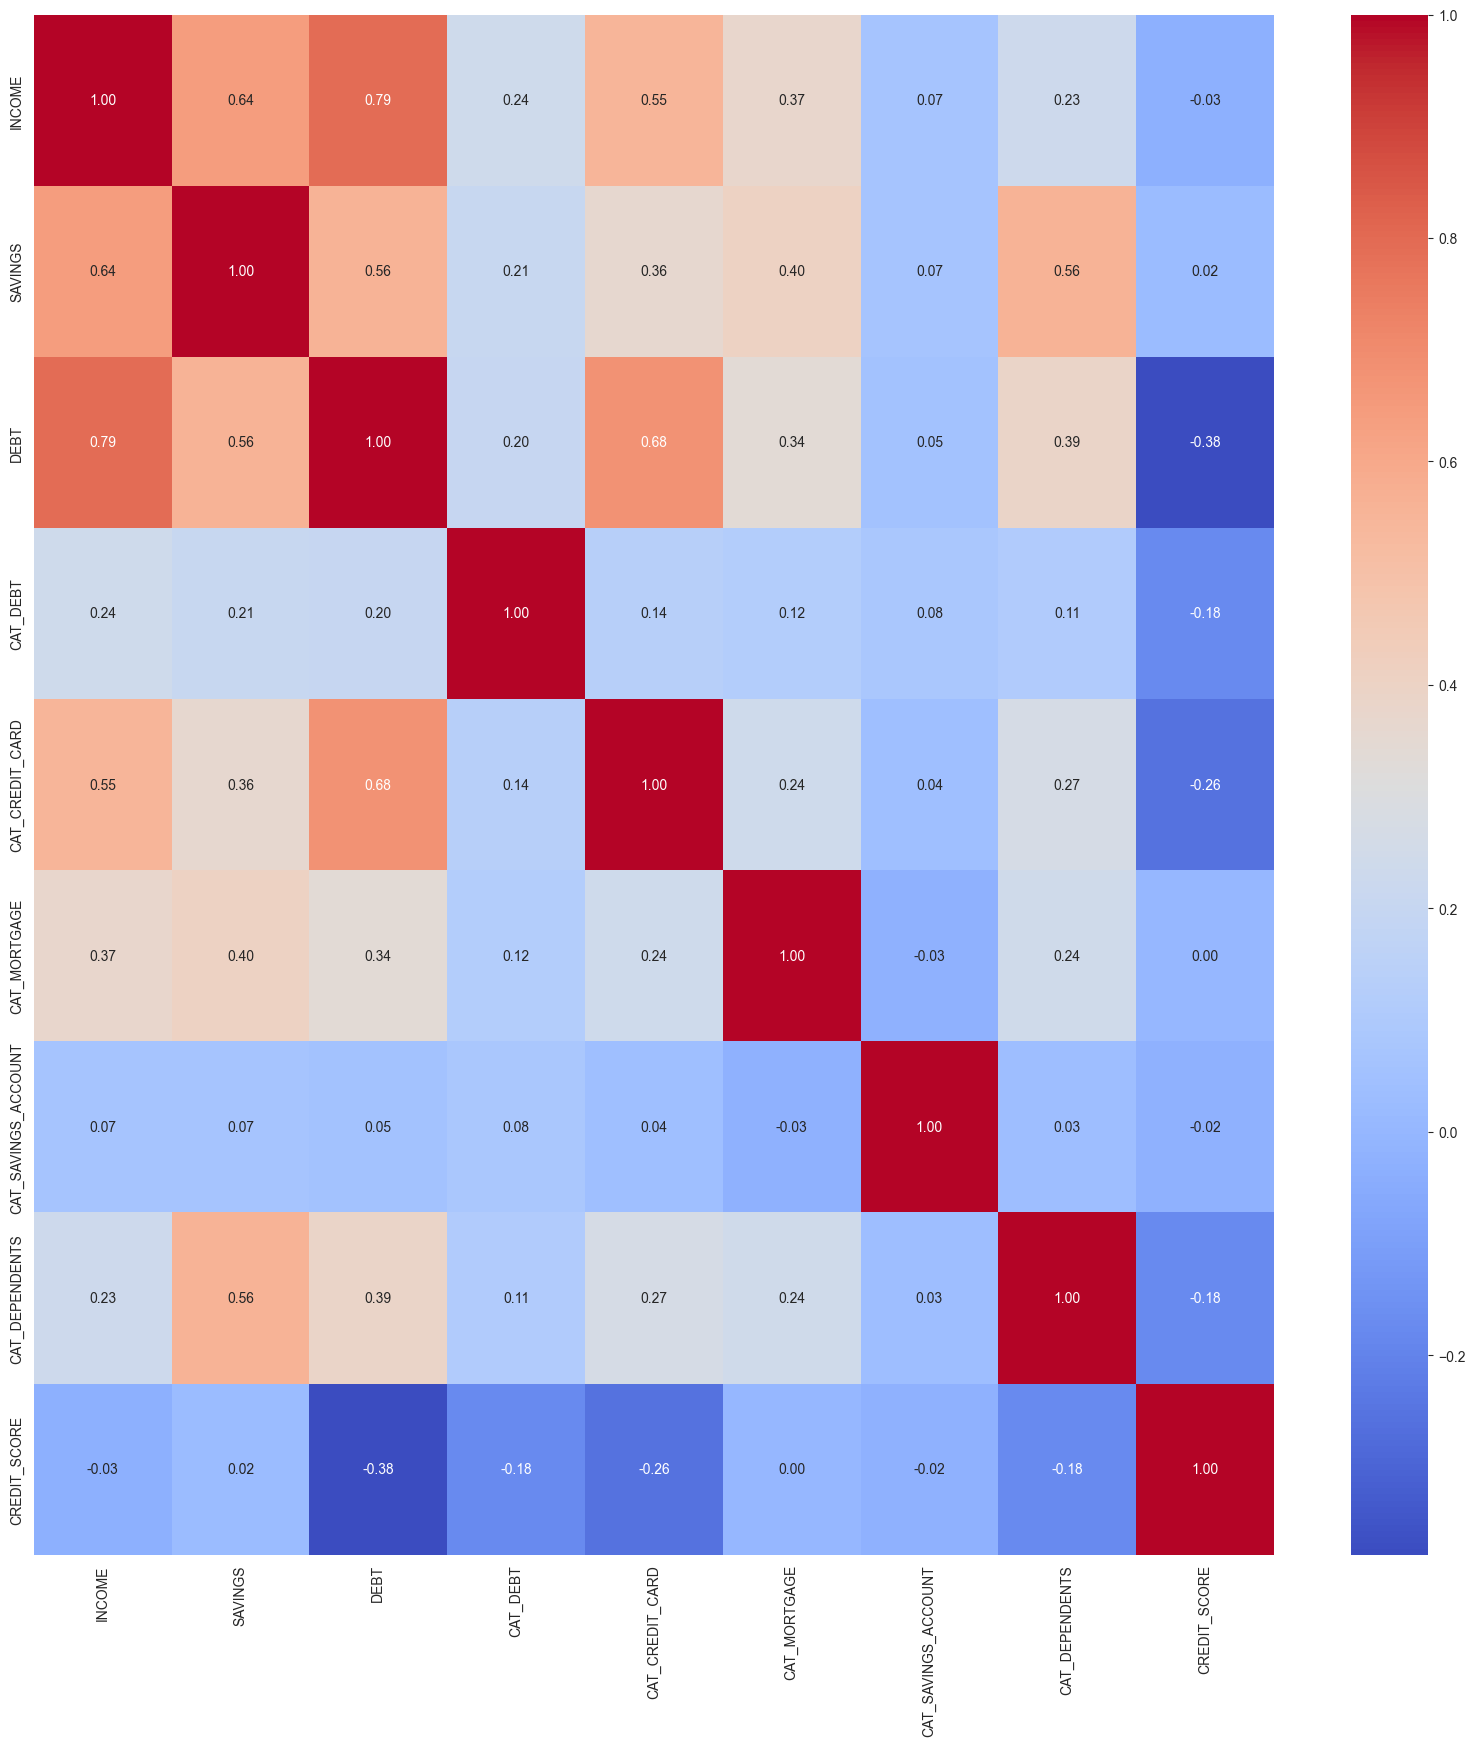

In [60]:
#correlation matrix heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

In [61]:
df_numeric = df[numeric_columns]
df_numeric

,INCOME,SAVINGS,DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,2783,1855,0,0,0,0,1,0,570
1,314430,445442,707468,1,0,1,1,0,691
2,161773,517674,2782496,1,1,1,1,1,520
3,16014,97685,20818,1,0,0,1,0,654
4,193225,1410542,2589215,1,1,0,1,1,552
...,...,...,...,...,...,...,...,...,...
133,386976,1250231,654883,1,0,0,1,0,562
134,16772,8386,0,0,0,0,1,0,619
135,137509,206264,206264,1,0,0,1,0,639
136,259146,1922000,1662854,1,1,0,1,1,587


In [22]:
#autoEDA
from pandas_profiling import ProfileReport
profile = ProfileReport(df_numeric, title='Pandas Profiling Report', explorative=True)
profile.to_file("output.html")

/opt/homebrew/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### We will try to find some columns that we should remove
- We will take a look at the correlation matrix

In [62]:
df_without_id= df.drop("CAT_GAMBLING", axis=1)
correlation_matrix = df_without_id.corr()
correlation_matrix

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.000000,0.639551,0.794340,-0.221536,0.132963,-0.141730,0.763465,0.625583,0.069063,0.021099,...,-0.568668,-0.269108,-0.239858,0.235680,0.551219,0.372637,0.067813,0.234979,-0.028914,0.051063
SAVINGS,0.639551,1.000000,0.563463,0.351945,0.054973,-0.238546,0.314432,0.250582,0.031636,-0.234611,...,-0.304250,-0.386255,-0.047963,0.206447,0.363834,0.403604,0.065844,0.559721,0.022086,0.016117
DEBT,0.794340,0.563463,1.000000,-0.202400,0.481277,-0.015348,0.566239,0.457082,0.031668,-0.024123,...,-0.423779,-0.207352,-0.300945,0.199420,0.680752,0.342674,0.054728,0.387629,-0.378567,0.144782
R_SAVINGS_INCOME,-0.221536,0.351945,-0.202400,1.000000,-0.300827,-0.295591,-0.318405,-0.240348,0.023581,-0.281825,...,0.104180,-0.430821,0.282758,0.164378,-0.153534,0.018979,0.072873,0.128680,0.232561,-0.057004
R_DEBT_INCOME,0.132963,0.054973,0.481277,-0.300827,1.000000,0.579709,0.075867,0.046699,-0.039655,0.025930,...,-0.111028,0.041136,-0.349363,0.253939,0.314153,0.057915,0.050697,0.249168,-0.847894,0.278265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,0.372637,0.403604,0.342674,0.018979,0.057915,-0.090204,0.161769,0.116443,0.016927,-0.097551,...,-0.164850,-0.144477,-0.097996,0.117468,0.236708,1.000000,-0.025429,0.242645,0.002800,0.056536
CAT_SAVINGS_ACCOUNT,0.067813,0.065844,0.054728,0.072873,0.050697,0.026451,0.055133,0.040940,0.007635,0.003429,...,-0.056376,-0.017483,-0.005811,0.083838,0.039321,-0.025429,1.000000,0.031574,-0.023362,0.043574
CAT_DEPENDENTS,0.234979,0.559721,0.387629,0.128680,0.249168,-0.109944,-0.004266,-0.006705,-0.014889,-0.213490,...,-0.073524,-0.197601,-0.137596,0.110718,0.272172,0.242645,0.031574,1.000000,-0.177667,0.087908
CREDIT_SCORE,-0.028914,0.022086,-0.378567,0.232561,-0.847894,-0.494735,-0.048437,-0.063606,-0.066297,-0.067809,...,-0.001888,-0.084545,0.302994,-0.178612,-0.259029,0.002800,-0.023362,-0.177667,1.000000,-0.328412


In [63]:
#take only where correlation is higher than 0.6
high_correlation_matrix=correlation_matrix[abs(correlation_matrix) > 0.6]
#remove rows and columns with all NaN
high_correlation_matrix=high_correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')
high_correlation_matrix

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.000000,0.639551,0.79434,NaN,NaN,NaN,0.763465,0.625583,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAVINGS,0.639551,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEBT,0.794340,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.680752,NaN,NaN,NaN,NaN,NaN
R_SAVINGS_INCOME,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_DEBT_INCOME,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.847894,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CAT_SAVINGS_ACCOUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
CAT_DEPENDENTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
CREDIT_SCORE,NaN,NaN,NaN,NaN,-0.847894,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


<Axes: >

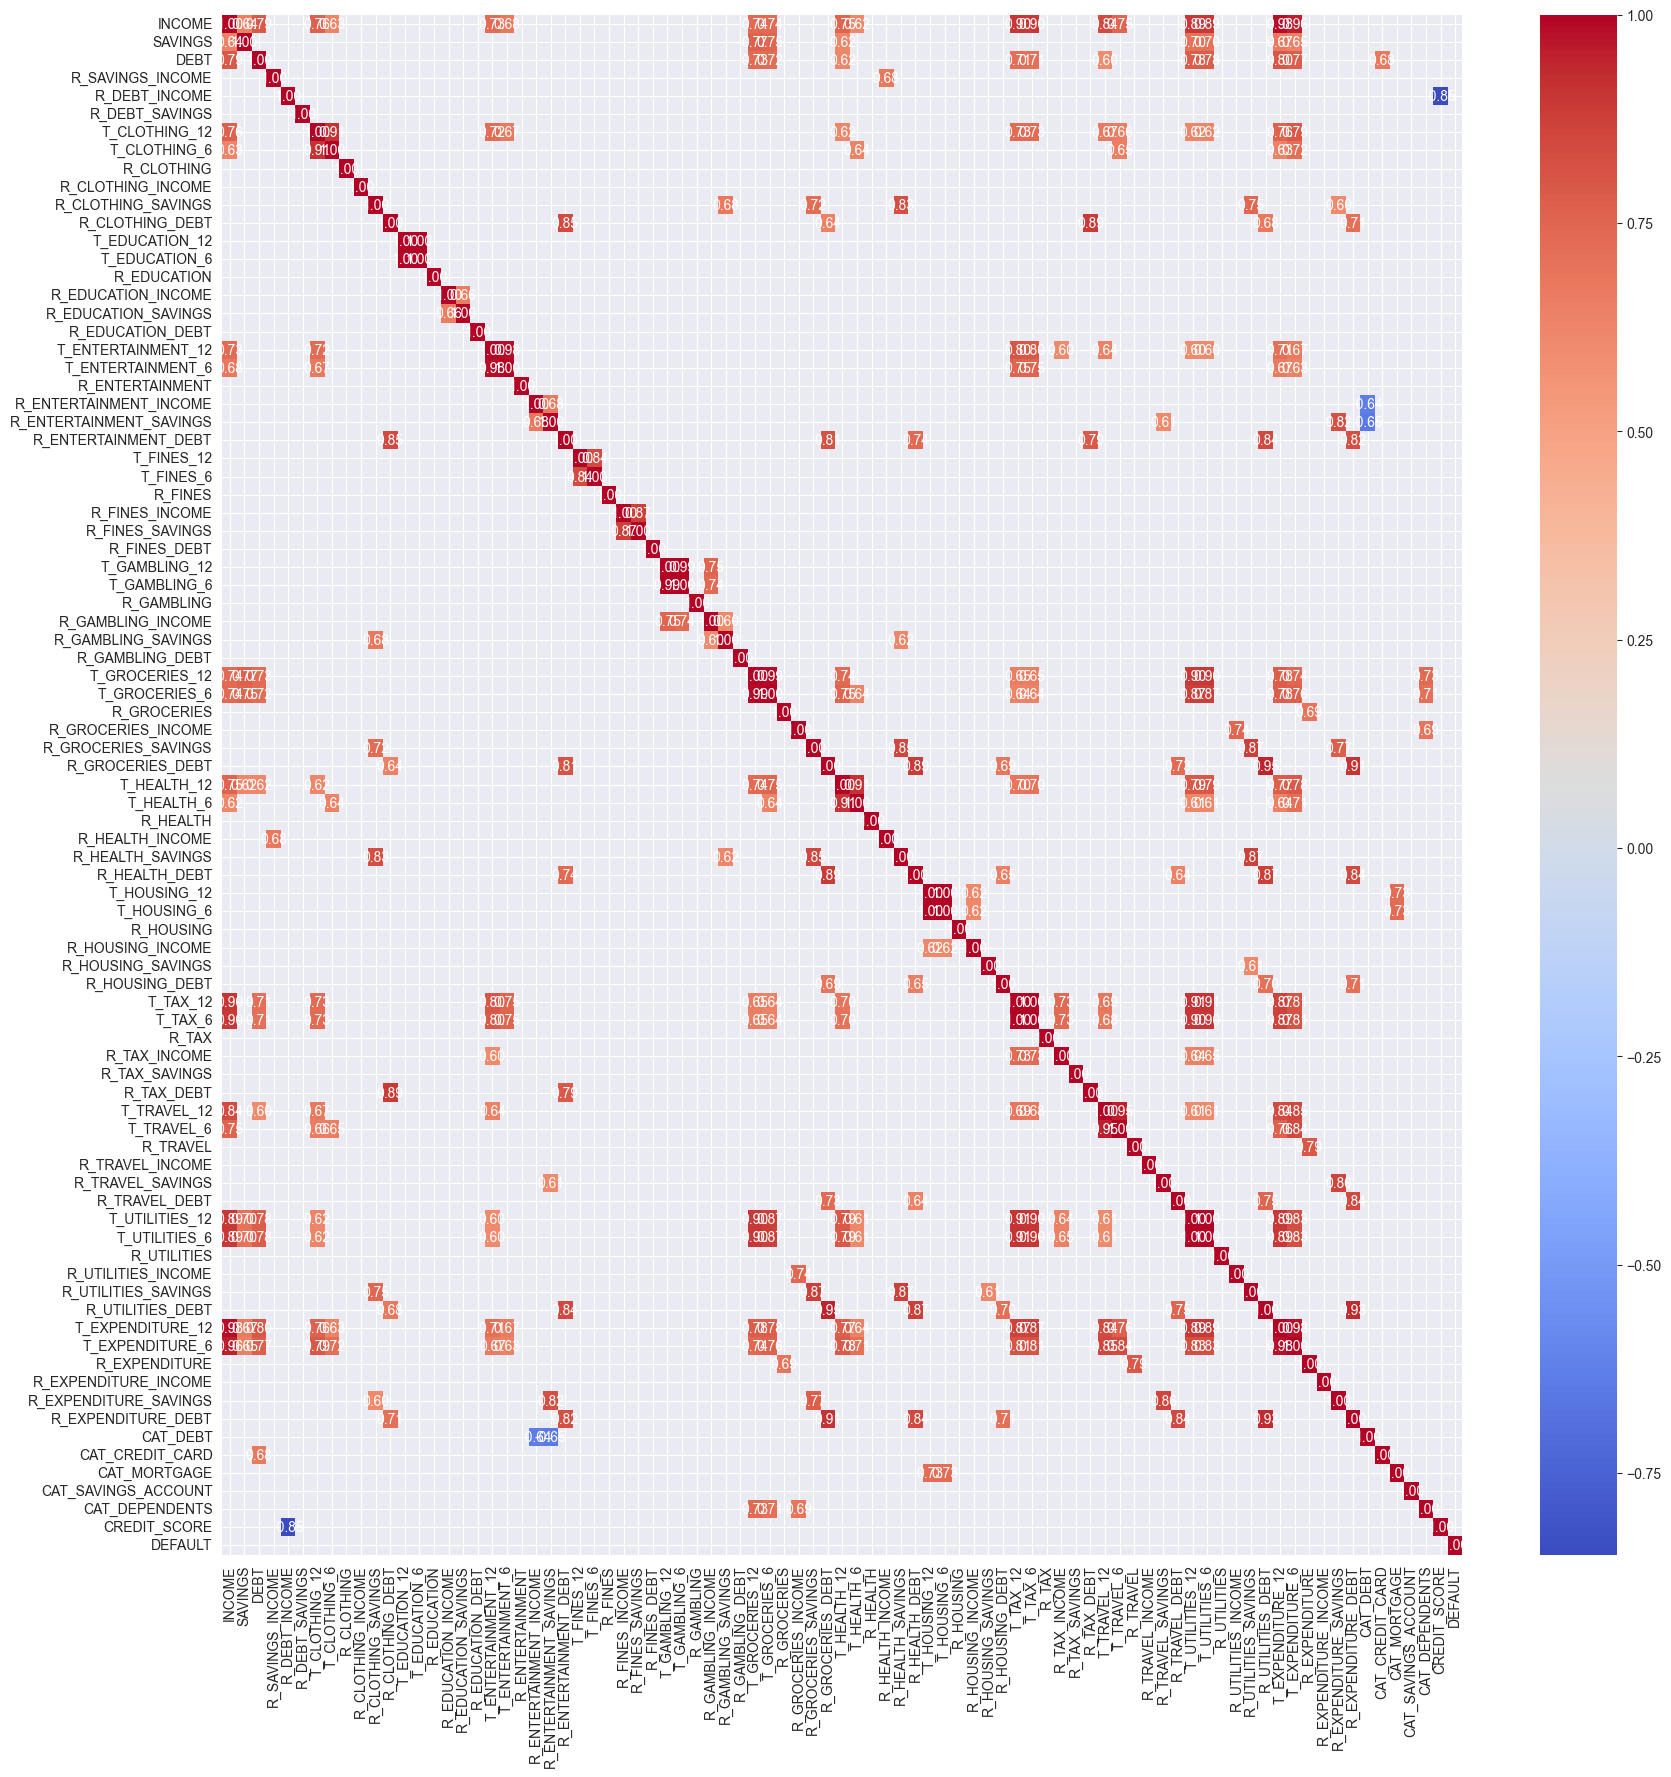

In [64]:
# plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(high_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

### Canditates for removal - high correlation with other columns
- T_TAX_6
- T_TAX_12
- T_UTILITIES_6
- T_UTILITIES_12
- T_EXPENDITURE_6
- T_EXPENDITURE_12


<Axes: xlabel='INCOME', ylabel='Count'>

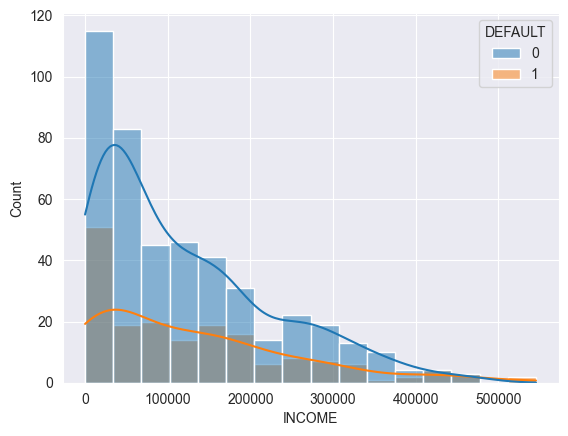

In [65]:
# stwórz histogram po Income dla DEFAULT=0 i DEFAULT=1
sns.histplot(data=df, x='INCOME', hue=target, kde=True)

In [66]:
# how many columns starting with R
r_columns = [col for col in df.columns if col.startswith('R_')]
# count
len(r_columns)

51

In [67]:
r_columns

['R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'R_CLOTHING',
 'R_CLOTHING_INCOME',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'R_EDUCATION',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_SAVINGS',
 'R_ENTERTAINMENT_DEBT',
 'R_FINES',
 'R_FINES_INCOME',
 'R_FINES_SAVINGS',
 'R_FINES_DEBT',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'R_HOUSING',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R_HOUSING_DEBT',
 'R_TAX',
 'R_TAX_INCOME',
 'R_TAX_SAVINGS',
 'R_TAX_DEBT',
 'R_TRAVEL',
 'R_TRAVEL_INCOME',
 'R_TRAVEL_SAVINGS',
 'R_TRAVEL_DEBT',
 'R_UTILITIES',
 'R_UTILITIES_INCOME',
 'R_UTILITIES_SAVINGS',
 'R_UTILITIES_DEBT',
 'R_EXPENDITURE',
 'R_EXPENDITURE_INCOME',
 'R_EXPENDITURE_SAVINGS',
 'R_EXPENDITU